___
# PROJETO 1

## <font color='red'>Luigi Noronha Lima de Almeida</font>
___

## <font color='blue'>Como a o nivel de escolaridade afeta o futuro das pessoas?</font>

## Introdução

O objetivo desse trabalho é responder a pergunta proposta, analisando as influências dos níveis de escolaridade nos aposentados. Para isso, recorreremos à base de dados PNAD de 2014 como obtenção de dados a serem avalidados. 
A metodologia é composta por uma comparação dos grupos de aposentados com ensino superior de graduação, e com o ensino fundamental. Essa comparação será dada a partir dos aspectos de rendimento mensal domiciliar, trabalhou na semana de referência, idade do morador, alem da variável de nível de ensino. 


___
## Análise e Resultados

Construindo recursos para a análise:

In [209]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [210]:
pnad2014 = pd.read_csv('PES2014.csv', sep=',')

In [211]:
estrutura = pd.read_table("pes_py.txt", sep=";")

In [212]:
dados = pd.DataFrame()
dados['aposentado'] = pnad2014.V9122 #2 = sim, 4 = não
dados['nivel_de_ensino'] = pnad2014.V6007# 08 = superior de graduacao, 04 = fundamental
dados['rendimento_mensal'] = pnad2014.V4721
dados['trabalho'] = pnad2014.V9001#1 = sim, 3 = não
dados['idade'] = pnad2014.V8005#de 000 até 120 anos.
dados['comecou_trabalhar'] = pnad2014.V9892
dados.nivel_de_ensino = dados.nivel_de_ensino.astype('category')
dados.nivel_de_ensino.cat.categories = ('Primário','2','3','Fundamental','Ensino Médio','6','7','Superior','9','10','11','12','13')
dados.trabalho = dados.trabalho.astype('category')
dados.trabalho.cat.categories = ('Sim','Não')
dados.aposentado = dados.aposentado.astype('category')
dados.aposentado.cat.categories = ('Sim','Não')
#Rendimento mensal é quantitativo.
#Idade é quantitativo.
#comecou_trabalhar é quantitativo


Primeiro, vamos analisar a proporção de aposentados em cada nivel de ensino analisado.

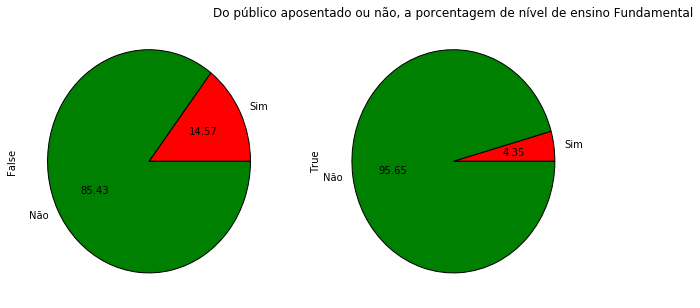

In [213]:
#dados.aposentado.value_counts()
#ct1 = pd.crosstab(dados.nivel_de_ensino , dados.aposentado )
#ct1.plot.bar( color=('red','green') ,figsize=(10,7))
ct1 = pd.crosstab(dados.aposentado, dados.nivel_de_ensino == 'Fundamental' )
ct1.plot(kind='pie', colors=('red', 'green'), autopct="%.2f", legend=False, subplots = True ,figsize=(10,5))
plt.title('Do público aposentado ou não, a porcentagem de nível de ensino Fundamental')

A partir desses gráficos, podemos observar que entre os aposentados (True), 4.35% possuiram como nível de ensino Fundamental.

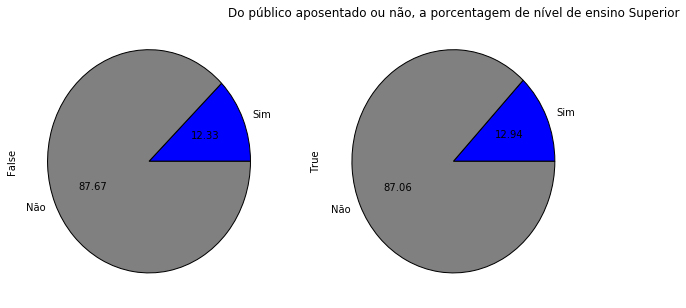

In [214]:
ct2 = pd.crosstab(dados.aposentado, dados.nivel_de_ensino == 'Superior' )
ct2.plot(kind='pie', colors=('blue', 'grey'), autopct="%.2f", legend=False, subplots = True ,figsize=(10,5))
plt.title('Do público aposentado ou não, a porcentagem de nível de ensino Superior')

Observamos que, em aposentados(True), 12,94% possuem nível de ensino superior, estabelecendo uma diferença brusca com a parte que tem o Fundamental como nível de ensino. 

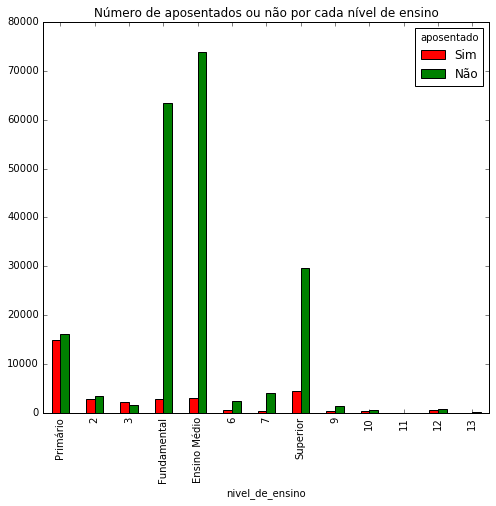

In [215]:
ct3 = pd.crosstab(dados.nivel_de_ensino , dados.aposentado )
ct3.plot.bar( color=('red','green') ,figsize=(8,7))
plt.title('Número de aposentados ou não por cada nível de ensino')

Apenas a título de curiosidade, este gráfico mostra a comparação de aposentados ou não por nível de ensino. Vale destacar que a maioria dos aposentados possui como nível de ensino Primário, e a maioria dos não aposentados está cursando ou cursou o Ensino Médio. Devemos, agora, analisar de forma mais detalhada o perfil desse público. 

Vamos analisar o público de aposentados partindo da idade. Analisaremos, primeiramente, o perfil de idades nesse público.

In [216]:
dados.idade.describe()

count    362627.000000
mean         33.554051
std          21.017324
min           0.000000
25%          16.000000
50%          32.000000
75%          49.000000
max         120.000000
Name: idade, dtype: float64

Agora, analisaremos as frequências de faixa de idades de aposentados em níveis de ensino Fundamental e Superior.

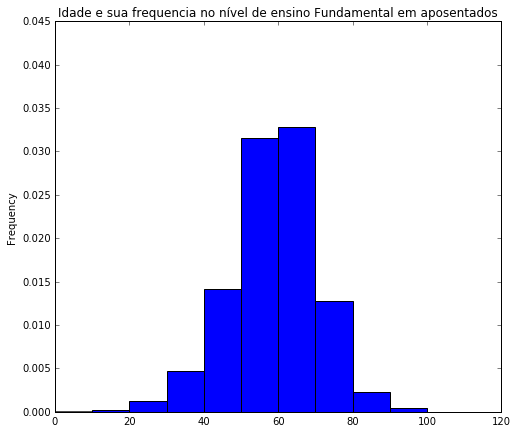

In [217]:
faixa1 = np.arange(0, 120, 10)
k1 = dados[(dados.nivel_de_ensino == 'Fundamental') & (dados.aposentado == 'Sim')]
plot1 = k.idade.plot.hist(bins= faixa1, normed = 1, figsize=(8,7))
plt.axis([0, 120, 0, 0.045])
plt.title("Idade e sua frequencia no nível de ensino Fundamental em aposentados")

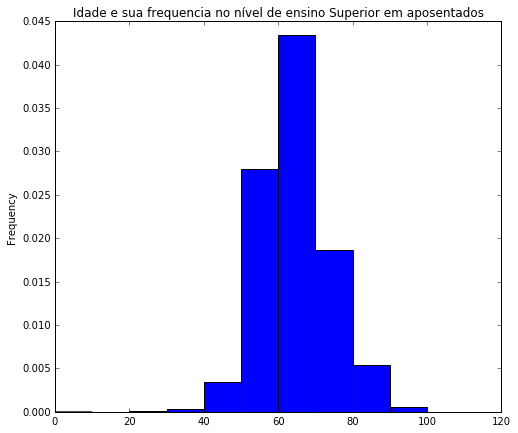

In [218]:
k2 = dados[(dados.nivel_de_ensino == 'Superior') & (dados.aposentado == 'Sim')]
plot2 = k2.idade.plot.hist(bins= faixa1, normed = 1, figsize=(8,7))
plt.axis([0, 120, 0, 0.045])
plt.title("Idade e sua frequencia no nível de ensino Superior em aposentados")

A partir dos resultados dos gráficos, é possível perceber que os aposentados que possuem nível de ensino Fundamental tendem a se aposentar mais cedo do que os de nível Superior. Isso se conclui observando as colunas de 20-30, 30-40, 40-50, e 50-60, em que as frequências são mais elevadas para os de nível fundamental. O mesmo processo foi feito para as colunas de 60-70, 70-80, 80-90, 90-100, em que as frequências são maiores para os níveis Superior.

Partindo das conclusões anteriores, a fim de buscar uma explicação mais aprofundada, analisaremos agora o perfil de trabalho dos aposentados de cada tipo de nível de ensino. Inicialmente, vamos nos aprofundar na idade em que essas pessoas começaram a trabalhar, e depois, se elas continuam trabalhando mesmo estando aposentadas.

In [219]:
dados.comecou_trabalhar.describe()

count    190174.000000
mean         15.004370
std           4.447844
min           4.000000
25%          12.000000
50%          15.000000
75%          18.000000
max          72.000000
Name: comecou_trabalhar, dtype: float64

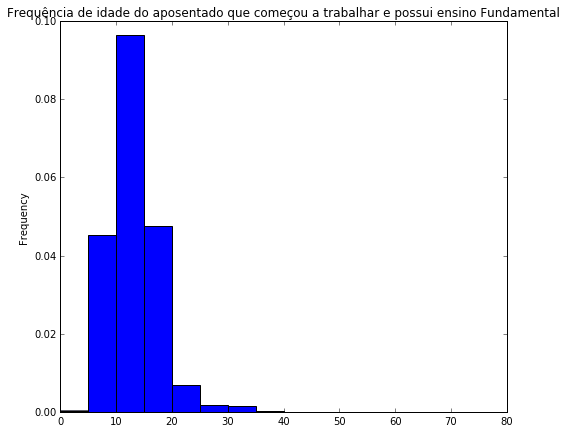

In [220]:
faixa2 = np.arange(0, 80, 5)
k3 = dados[(dados.nivel_de_ensino == 'Fundamental') & (dados.aposentado == 'Sim')].comecou_trabalhar
plot3 = k3.plot.hist(bins= faixa2, normed = 1, figsize=(8,7))
plt.axis([0, 80, 0, 0.1])
plt.title("Frequência de idade do aposentado que começou a trabalhar e possui ensino Fundamental")

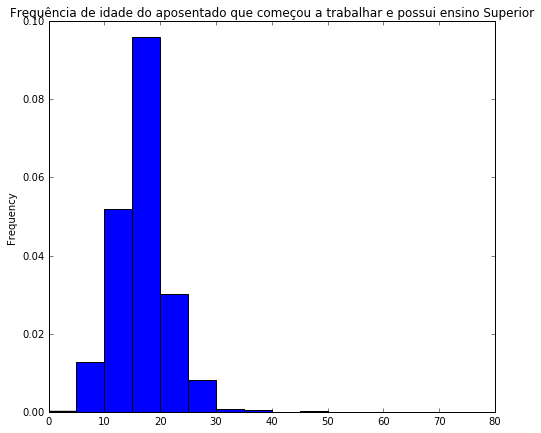

In [221]:
k4 = dados[(dados.nivel_de_ensino == 'Superior') & (dados.aposentado == 'Sim')].comecou_trabalhar
plot3 = k4.plot.hist(bins= faixa2, normed = 1, figsize=(8,7))
plt.axis([0, 80, 0, 0.1])
plt.title("Frequência de idade do aposentado que começou a trabalhar e possui ensino Superior")

A partir dos gráficos, é possível observar que na coluna de 5-10 e de 10-15 anos os aposentados de ensino Fundamental começaram a trabalhar mais cedo que os de ensino superior. Nas colunas de 20-25 e 25-30, os de ensino superior começam a trabalhar com maior frequência. É possível inferir que a causa dessa situação se dá por parte dos de ensino fundamental pois estes necessitam, após encerrar seus estudos no fundamental, a contribuir com a renda familiar. E por parte dos de ensino superior, há uma espera até a graduação para que haja contribuição monetária.

Analisando se trabalha ou não mesmo aposentado:

In [222]:
ct4 = dados[(dados.nivel_de_ensino == 'Fundamental') & (dados.aposentado == 'Sim')].trabalho
ct4.value_counts(True)*100

Não    76.896432
Sim    23.103568
dtype: float64

23% dos aposentados que possuem ensino fundamental continuam a trabalhar após se aposentarem.

In [223]:
ct5 = dados[(dados.nivel_de_ensino == 'Superior') & (dados.aposentado == 'Sim')].trabalho
ct5.value_counts(True)*100

Não    70.129575
Sim    29.870425
dtype: float64

29% dos aposentados que possuem ensino superior continuam trabalhando após se aposentarem.

Vemos que os aposentados de ensino Superior tendem a continuar trabalhando após a aposentadoria, que já é mais tardia que a dos de nível do ensino fundamental.

A última variável a ser considerada será a renda, a fim de estabelecer uma conexão com o nível de ensino.

In [224]:
r = dados.rendimento_mensal
r.describe()

count    3.619930e+05
mean     3.600622e+10
std      1.863058e+11
min      0.000000e+00
25%      1.284000e+03
50%      2.200000e+03
75%      4.000000e+03
max      1.000000e+12
Name: rendimento_mensal, dtype: float64

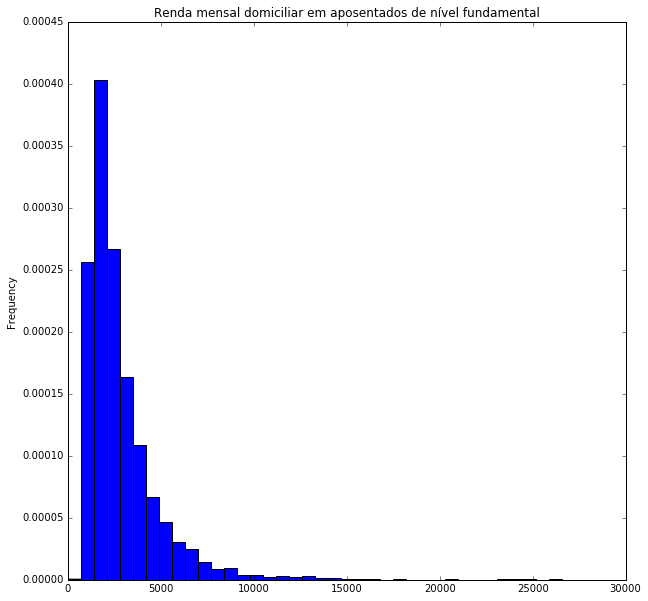

In [225]:
faixa3 = np.arange(0, 28000, 700)
k5 = dados[(dados.nivel_de_ensino == 'Fundamental') & (dados.aposentado == 'Sim')].rendimento_mensal
plot4 = k5.plot.hist(bins= faixa3, normed = 1, figsize=(10,10))
plt.title("Renda mensal domiciliar em aposentados de nível fundamental")

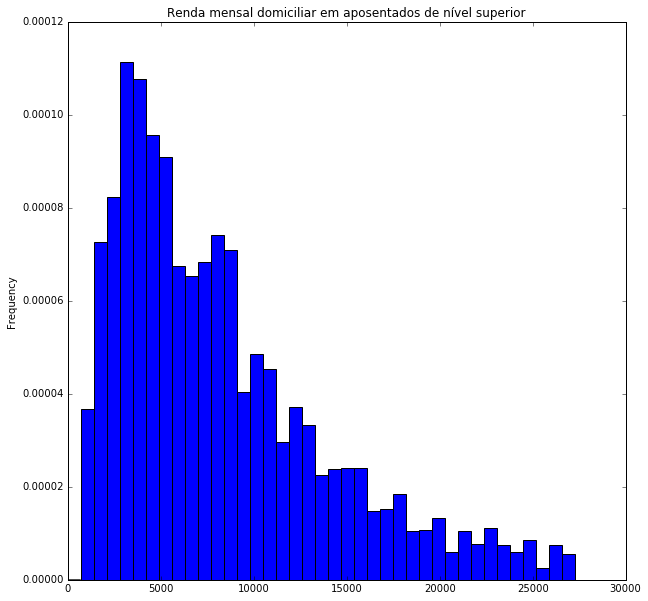

In [226]:
k6 = dados[(dados.nivel_de_ensino == 'Superior') & (dados.aposentado == 'Sim')].rendimento_mensal
plot5 = k6.plot.hist(bins= faixa3, normed = 1, figsize=(10,10))
plt.title("Renda mensal domiciliar em aposentados de nível superior")

De acordo com os resultados dos histogramas, é possível observar que a renda é significativamente maior para o público de aposentados de ensino superior.

___

___
## Conclusão 

A partir das análises feitas nos gráficos, podemos concluir que o nível de ensino Superior promove uma maior qualidade de vida para o futuro das pessoas. Pode-se afirmar isso, já que esse aposentado desse nível possui uma maior renda, uma maior tendência a permanescer em um emprego(também se aposentam mais tardiamente, provavelmente devido à permanência em um emprego sólido), não tende a trabalhar quando menor de idade (estudos como prioridade),e tendem a viver mais (vide o histograma de idades de idosos por nível de ensino. Esse efeito deve ser causado pela maior renda obtida, podendo optar por um atendimento de saúde privado, obtendo maior expectativa de vida).
Dessa forma, retornando à pergunta, um maior nível de escolaridade afetará fortemente e positivamente o futuro das pessoas.